# Generate paleogeographic reconstructions for Laurentia tectonics GSA Memoir papers

In [1]:
# standard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.patches as patches
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import stats
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)

# pmagpy
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import cartopy.crs as ccrs
import cartopy
import cartopy.io.shapereader as shpreader
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

import xml.etree.ElementTree as ET
import pygplates as pgp

from paleogeo_functions import *

In [2]:
def make_reconstructured_shapefile(gpml_file,rotation_file,reconstruction_time,anchor_plate,file_export_path_prefix):

    rotation_model = pgp.RotationModel(rotation_file)
    features = pgp.FeatureCollection(gpml_file)
    export_filename = file_export_path_prefix + '{0}Ma.shp'.format(reconstruction_time)
    pgp.reconstruct(features, rotation_model, export_filename, reconstruction_time, anchor_plate)

    fname = export_filename
    reconstructed_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), edgecolor='C0',linewidth=3,facecolor='none')
    return reconstructed_feature

## Define reconstruction style

In [3]:
India_color = '#f5c10e'
Rayner_color = '#ffe27e'
SChina_color = '#2ecc71'

Laurentia_color = '#feb5b1'
Scotland_color = 'greenyellow'
Baltica_color = '#90ee90'

Australia_color = '#9E7BB5'
Antarctica_color = '#E39FF6'
Zealandia_color = '#9867C5'

Siberia_color = 'grey'

NorthChina_color = 'darkkhaki'
Tarim_color = 'palegoldenrod'

Kalahari_color = 'orange'

Amazonia_color = '#4372AA'
RDLP_color = '#2372AA'
Arequipa_color = 'lightblue'
etcetera_color = '#b2b3b2'

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)

cratons_lw = 1.0
outline_lw = 0.25
cratons_alpha = 1.0

Origin of shapes used in shapes_cratons.gpml
- Laurentia and parauthothons are from Torsvik and Cocks and are then edited to match the southern Laurentia margin of Whitmeyer and Karlstrom. The Roberts Mountain Block of Torsvik and Cocks is pruned in to match the Proterozoic Laurentia for Whitmeyer and Karlstrom as well.
- Siberia (401) is the 401 Siberia of Torsvik and Cocks trimmed to match the extent of craton used in Merdith et al. 2021
- Siberia (404) is the Aldan of Torsvik and Cocks trimmed to not have extra part of Anabar
- Tarim is from Torsvik and Cocks (2017)
- North China is shape used in Ding
- Baltica is Torsvik and Cocks (2017) polygon
- Zealandia is a rough sketch based on Turnbull et al. 2021
- Arequipa polygon is from Blake Hodgin

## Define rotation parameters

In [25]:
Laur_Parauto_Euler = [71.87,97.94,-2.0] #Torsvik and Cocks (2017)
Greenland_Laur_Euler = [67.5,-118.5,-13.8] #Roest and Srivastava (1989)
SWEllesmere_Greenland_Euler = [41.0,180.0,2.0] #Torsvik and Cocks (2017)
Devon_SWEllesmere_Euler = [1.0,180.0,0.7] #Torsvik and Cocks (2017)
Svalbard_Laur_Euler = [-81.0,125.0,68.0]
Scotland_Laur_Euler = [78.64,161.9,-32.0]

def plot_Laurentia(ax, Laur_Euler):
    # Laurentia
    craton_plot(ax, [101], [Laur_Euler],
                'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    craton_plot(ax, [101], [Laur_Euler],
            'k', Laurentia_color, cratons_alpha, outline_lw, gpml='CEED6_LAND_select.gpml',draw_face=False)
    craton_plot(ax, [153], [Laur_Euler],
                'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    craton_plot(ax, [162], [Laur_Euler],
                'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

    # Greenland, Ellesmere, Devon
    craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler],
                'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler],
            'k', Laurentia_color, cratons_alpha, outline_lw, gpml='CEED6_LAND_select.gpml',draw_face=False)
    craton_plot(ax, [121], [SWEllesmere_Greenland_Euler, Greenland_Laur_Euler, Laur_Euler],
                'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    craton_plot(ax, [130], [Devon_SWEllesmere_Euler, SWEllesmere_Greenland_Euler, Greenland_Laur_Euler, Laur_Euler],
                'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    
    # Scotland
    craton_plot(ax, [303], [Scotland_Laur_Euler, Laur_Euler],
            'k', Scotland_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    craton_plot(ax, [303], [Scotland_Laur_Euler, Laur_Euler],
            'k', Scotland_color, cratons_alpha, outline_lw, gpml='CEED6_LAND_select.gpml',draw_face=False)

Siberia_Laur_Euler = [77.0,98.0,137.0] #Long-lived, tight fit proposed in Evans et al. 2016
Viljay_Rift_Euler = [60.0,100.0,14.0] #Aldan (404) to Anabar (401) rotation of Torsvik and Cocks 2017

def plot_Siberia(ax, Laur_Euler):
    craton_plot(ax, [401], [Siberia_Laur_Euler, Laur_Euler],
                'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    craton_plot(ax, [404], [Viljay_Rift_Euler, Siberia_Laur_Euler, Laur_Euler],
                'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')


NChina_Laur_Euler = [52.9462,27.2366,61.9218] #adjusted from Ding et al. 2021 which is too tight and overlaps with Laurentia
#NChina_Laur_Euler = [58,30,68] #Ding et al. 2021

def plot_North_China(ax, Laur_Euler):
    #North China
    # craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler],
    #             'k', NorthChina_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
    craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler],
                'k', NorthChina_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

Tarim_Laur_Euler = [74,340,124] #Ding et al. 2021 modification of Wen model

SAus_Laur_Euler = [-35.4124,-32.1725,-128.5807]
NAus_SAus_Euler = [-20.0,135.0,-40.0]
Antarctica_SAus_Euler = [-3.91,37.9,30.86]
def plot_Australia(ax, Laur_Euler):
    craton_plot(ax, [801], [SAus_Laur_Euler, Laur_Euler],
                'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
    craton_plot(ax, [8011], [NAus_SAus_Euler, SAus_Laur_Euler, Laur_Euler],
                'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
    craton_plot(ax, [802], [Antarctica_SAus_Euler, SAus_Laur_Euler, Laur_Euler],
                'k', Antarctica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

Zealandia_Laur_Euler = [22.1,151.6,116.6]
def plot_Zealandia(ax, Laur_Euler):
    craton_plot(ax, [8060], [Zealandia_Laur_Euler, Laur_Euler],
                'k', Zealandia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=False)

#Baltica_Laur_Euler = [75.8,-95.8,-59.2] #version currently in our Rodinia model
#Baltica_Laur_Euler = [74.8,-58.1,-72.3] #possible model update to match CIMP fit
#Baltica_Laur_Euler = [81,250,-50] #Cawood et al 2010 as implemented in Ding2021

def plot_Baltica(ax, Laur_Euler):
    craton_plot(ax, [302], [Baltica_Laur_Euler, Laur_Euler],
                'k', Baltica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    craton_plot(ax, [302], [Baltica_Laur_Euler, Laur_Euler],
            'k', Baltica_color, cratons_alpha, outline_lw, gpml='CEED6_LAND_select.gpml',draw_face=False)

#Amazonia_Laur_Euler = [13.3,-49.3,-108.6]
#Amazonia_Laur_Euler = [-12,133,111]
#Amazonia_Laur_Euler = [12.1,-44.3,-96.9]
Amazonia_Laur_Euler = [11.8842,-42.4498,-103.372]
def plot_Amazonia(ax, Laur_Euler):
    craton_plot(ax, [201], [Amazonia_Laur_Euler, Laur_Euler],
                'k', Amazonia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

RDLP_Amazonia_Euler = [-15.2738,-76.0836,36.1418]
def plot_RDLP(ax, Laur_Euler):
    craton_plot(ax, [203], [RDLP_Amazonia_Euler,Amazonia_Laur_Euler, Laur_Euler],
                'k', RDLP_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=False)

Parana_Amazonia_Euler = [0.67,103.22,-30.82]


Arequipa_Antofalla_Euler = [-16.17,-68.14,-17.12]
Antofalla_Laur_Euler = [11.7727,-52.3764,-100.4464]
Pampia_Antofalla_Euler = [90.0,0.0,0.0]
def plot_AREPA(ax, Laur_Euler):
    craton_plot(ax, [20110], [Arequipa_Antofalla_Euler,Antofalla_Laur_Euler, Laur_Euler],
                'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    craton_plot(ax, [20111], [Antofalla_Laur_Euler, Laur_Euler],
                'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    craton_plot(ax, [2902], [Pampia_Antofalla_Euler,Antofalla_Laur_Euler, Laur_Euler],
                'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
    
Cuyania_Laur_Euler = [-8.3602,123.7318,114.5843]
def plot_Cuyania(ax, Laur_Euler):
    craton_plot(ax, [2901], [Cuyania_Laur_Euler, Laur_Euler],
                'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Kalahari_Laur_Euler = [15.102,-25.2783,-157.5464] #Tight in Rodinia model
Kalahari_Laur_Euler = [13.6064,-25.6736,-154.3672] #allows space for Arequipa ribbon continent
def plot_Kalahari(ax, Laur_Euler):
    craton_plot(ax, [7011], [Kalahari_Laur_Euler, Laur_Euler],
                'k', Kalahari_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

India_Euler_755 = [65.4126,103.9231,-29.3572]
SChina_India_Euler = [6.7224,77.6921,67.9571]
Rayner_India_Euler = [1.8434,-165.1696,-91.8395]

## 1140 Ma

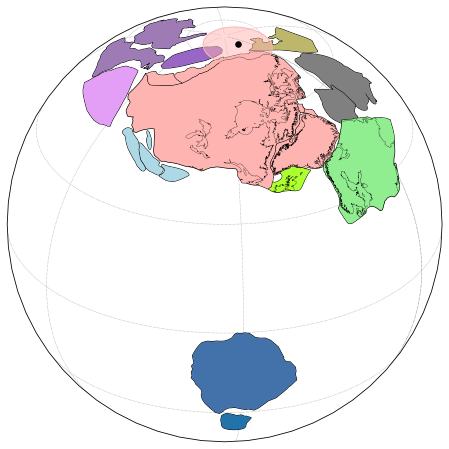

In [26]:
Laur_Euler_1140 = [-70.8963,21.4214,213.1761]

ax = ipmag.make_orthographic_map(add_land=False, central_longitude=115, central_latitude=30,
                                 figsize=(8,8), grid_lines=False)

plot_Laurentia(ax,Laur_Euler_1140)
plot_Siberia(ax,Laur_Euler_1140)

Baltica_Laur_Euler = [47.5,1.5,49.0] #1140 Ma
plot_Baltica(ax,Laur_Euler_1140)

Amazonia_Laur_Euler = [-81.1,32.0,-41.1] #1140 Ma
plot_Amazonia(ax,Laur_Euler_1140)

#Kalahari_Laur_Euler = [1.4,5.4,-48.1] #1140 Ma
#plot_Kalahari(ax, Laur_Euler_1140)

plot_RDLP(ax,Laur_Euler_1140)
plot_North_China(ax,Laur_Euler_1140)
plot_Australia(ax,Laur_Euler_1140)
plot_Cuyania(ax, Laur_Euler_1140)
plot_AREPA(ax, Laur_Euler_1140)
plot_Zealandia(ax, Laur_Euler_1140)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

rotated_pole_plot(ax, 223.3, 58.0, 9.2,
                  [Laur_Euler_1140],
                  'o', 30, 'k', Laurentia_color, 0.5)

plt.savefig('reconstructions/Laurentia_1140.pdf')
plt.show()

## 1110 Ma

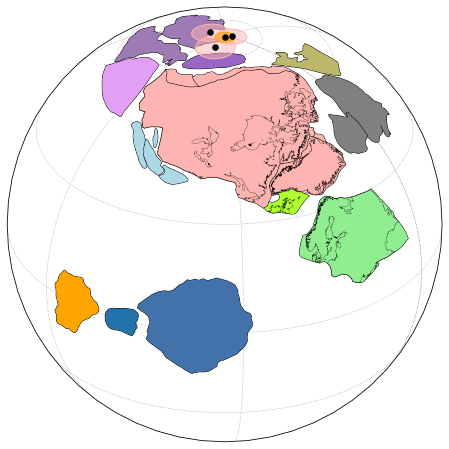

In [27]:
Laur_Euler_1110 = [-66.3558,18.0002,218.7758]

ax = ipmag.make_orthographic_map(add_land=False, central_longitude=115, central_latitude=30,
                                 figsize=(8,8), grid_lines=False)

plot_Laurentia(ax,Laur_Euler_1110)
plot_Siberia(ax,Laur_Euler_1110)

Baltica_Laur_Euler = [8.5,-168.3,-21.2] #1110 Ma
plot_Baltica(ax,Laur_Euler_1110)

Amazonia_Laur_Euler = [-10.4,-37.2,-76.4] #1110 Ma
plot_Amazonia(ax,Laur_Euler_1110)

Kalahari_Laur_Euler = [5.7,-15.6,-119.8] #1110 Ma
plot_Kalahari(ax, Laur_Euler_1110)

plot_RDLP(ax,Laur_Euler_1110)
plot_North_China(ax,Laur_Euler_1110)
plot_Australia(ax,Laur_Euler_1110)
plot_Cuyania(ax, Laur_Euler_1110)
plot_AREPA(ax, Laur_Euler_1110)
plot_Zealandia(ax, Laur_Euler_1110)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#Lower Mamainse R1 pole
rotated_pole_plot(ax, 227, 45.5, 5.3,
                  [Laur_Euler_1110],
                  'o', 30, 'k', Laurentia_color, 0.5)
#Nipigon sills
rotated_pole_plot(ax, 217.8, 47.2, 4.0,
                  [Laur_Euler_1110],
                  'o', 30, 'k', Laurentia_color, 0.5)
#Lower Osler
rotated_pole_plot(ax, 218.6, 40.9, 4.8,
                  [Laur_Euler_1110],
                  'o', 30, 'k', Laurentia_color, 0.5)

#Umkondo
rotated_pole_plot(ax, 222.1, -64.0, 2.6,
                  [Kalahari_Laur_Euler,Laur_Euler_1110],
                  'o', 30, 'k', Kalahari_color, 0.5)


plt.savefig('reconstructions/Laurentia_1110.pdf')
plt.show()

## 1060 Ma

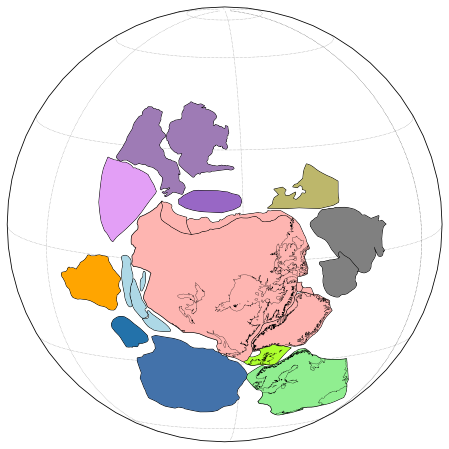

In [7]:
Laur_Euler_1060 = [-43.5,-18.9,194.8]

Baltica_Laur_Euler = [77.0273,-130.9802,-42.9243]
Amazonia_Laur_Euler = [11.8842,-42.4498,-103.372]
Kalahari_Laur_Euler = [13.6064,-25.6736,-154.3672]

ax = ipmag.make_orthographic_map(add_land=False, central_longitude=115, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)

plot_Laurentia(ax,Laur_Euler_1060)
plot_Siberia(ax,Laur_Euler_1060)
plot_Baltica(ax,Laur_Euler_1060)
plot_Amazonia(ax,Laur_Euler_1060)
plot_RDLP(ax,Laur_Euler_1060)
plot_North_China(ax,Laur_Euler_1060)
plot_Australia(ax,Laur_Euler_1060)
plot_Kalahari(ax, Laur_Euler_1060)
plot_Cuyania(ax, Laur_Euler_1060)
plot_AREPA(ax, Laur_Euler_1060)
plot_Zealandia(ax, Laur_Euler_1060)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

plt.savefig('reconstructions/Laurentia_1060.pdf')
plt.show()

# Neoproterozoic reconstructions

## 775 Ma

In [8]:
Gunbarrel_dikes_file = '../data/paleogeography/Gunbarrel_dikes.gpml'
rotation_file = '../data/paleogeography/TC2017-SHM2017-D2018-extended.rot'
reconstruction_time = 775
anchor_plate = 1
file_export_path_prefix = '../data/paleogeography/Gunbarrel_reconstructed_'

Gunbarrel_dikes = make_reconstructured_shapefile(Gunbarrel_dikes_file,rotation_file,reconstruction_time,anchor_plate,file_export_path_prefix)

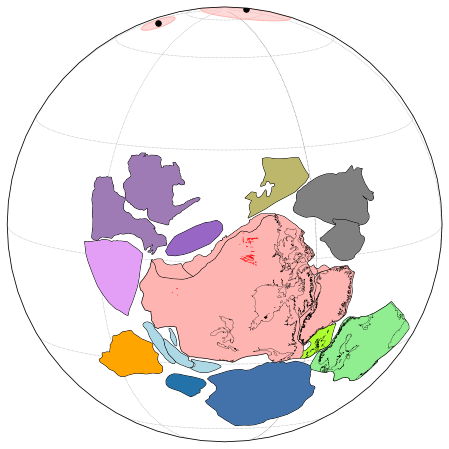

In [9]:
Laur_Euler_775 = [-47.1,-12.5,146.1]

ax = ipmag.make_orthographic_map(add_land=False, central_longitude=155, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)

plot_Laurentia(ax,Laur_Euler_775)
plot_Siberia(ax,Laur_Euler_775)
plot_Baltica(ax,Laur_Euler_775)
plot_Amazonia(ax,Laur_Euler_775)
plot_RDLP(ax,Laur_Euler_775)
plot_North_China(ax,Laur_Euler_775)
plot_Australia(ax,Laur_Euler_775)
plot_Kalahari(ax, Laur_Euler_775)
plot_Cuyania(ax, Laur_Euler_775)
plot_AREPA(ax, Laur_Euler_775)
plot_Zealandia(ax, Laur_Euler_775)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#LIP lines
ax.add_feature(Gunbarrel_dikes,color='red',linewidth=0.75)

#Gunbarrel pole
rotated_pole_plot(ax, 138.2, 9.1, 12.0,
                  [Laur_Euler_775],
                  'o', 30, 'k', Laurentia_color, 0.5)
#Uinta Mtn pole
rotated_pole_plot(ax, 161.3, 0.8, 4.7,
                  [Laur_Euler_775],
                  'o', 30, 'k', Laurentia_color, 0.5)

# #Johnny's Creek pole
# rotated_pole_plot(ax, 83, 15.8, 13.5,
#                   [NAus_SAus_Euler, SAus_Laur_Euler, Laur_Euler_775],
#                   'o', 30, 'k', Australia_color, 0.5)

# #775 Ma North China pole
# rotated_pole_plot(ax, 29, 244.7, 5.4,
#                   [NChina_Laur_Euler, Laur_Euler_775],
#                   'o', 30, 'k', NorthChina_color, 0.5)

plt.savefig('reconstructions/Laurentia_775.pdf')
plt.show()

## 720 Ma

In [10]:
Laur_Euler_720 = [-47.1,-2.2,156.4]
Kalahari_Laur_Euler = [14.6227,-24.1444,-149.314]
SAus_Laur_Euler = [-29.733,-20.5713,-124.2953]

In [11]:
Franklin_dikes_file = '../data/paleogeography/Franklin_dikes.gpml'
rotation_file = '../data/paleogeography/TC2017-SHM2017-D2018-extended.rot'
reconstruction_time = 720
anchor_plate = 1
file_export_path_prefix = '../data/paleogeography/Franklin_reconstructed_'

Franklin_dikes = make_reconstructured_shapefile(Franklin_dikes_file,rotation_file,reconstruction_time,anchor_plate,file_export_path_prefix)

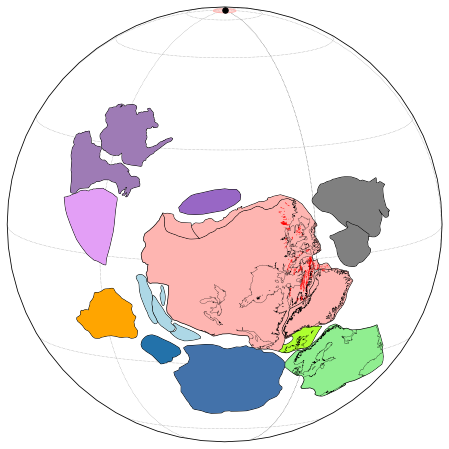

In [12]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=155, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)

plot_Laurentia(ax,Laur_Euler_720)
plot_Siberia(ax,Laur_Euler_720)
plot_Baltica(ax,Laur_Euler_720)
plot_Amazonia(ax,Laur_Euler_720)
plot_RDLP(ax,Laur_Euler_720)
plot_Australia(ax,Laur_Euler_720)
plot_Kalahari(ax, Laur_Euler_720)
plot_Cuyania(ax, Laur_Euler_720)
plot_AREPA(ax, Laur_Euler_720)
plot_Zealandia(ax, Laur_Euler_720)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#Franklin LIP lines
ax.add_feature(Franklin_dikes,color='red',linewidth=0.5)

#Franklin LIP pole
rotated_pole_plot(ax, 162.1, 6.7, 3.0,
                  [Laur_Euler_720],
                  'o', 30, 'k', Laurentia_color, 0.5)

plt.savefig('reconstructions/Laurentia_720.pdf')
plt.show()

## 610 Ma

In [13]:
Laur_Euler_610 = [34.1,-165.2,-157.2]

In [14]:
rotation_file = '../data/paleogeography/TC2017-SHM2017-D2018-extended.rot'
reconstruction_time = 610
anchor_plate = 1

Baltica_dikes_file = '../data/paleogeography/Baltica_dikes.gpml'
file_export_path_prefix = '../data/paleogeography/Baltica_reconstructed_'

Baltica_dikes = make_reconstructured_shapefile(Baltica_dikes_file,rotation_file,reconstruction_time,anchor_plate,file_export_path_prefix)

CIMP_dikes_file = '../data/paleogeography/CIMP_dikes.gpml'
file_export_path_prefix = '../data/paleogeography/CIMP_reconstructed_'
CIMP_dikes = make_reconstructured_shapefile(CIMP_dikes_file,rotation_file,reconstruction_time,anchor_plate,file_export_path_prefix)

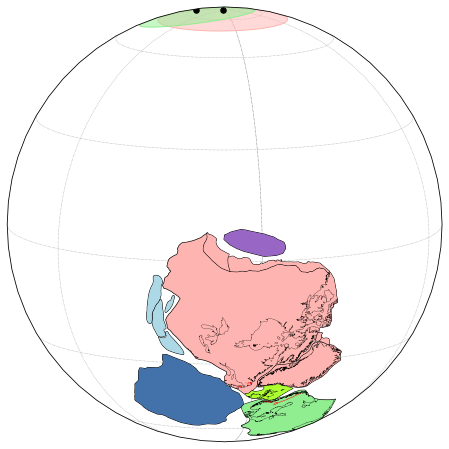

In [15]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=170, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)

plot_Laurentia(ax,Laur_Euler_610)
plot_Baltica(ax,Laur_Euler_610)
plot_Amazonia(ax,Laur_Euler_610)
plot_Cuyania(ax, Laur_Euler_610)
plot_AREPA(ax, Laur_Euler_610)
plot_Zealandia(ax, Laur_Euler_610)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#LIP lines
ax.add_feature(Baltica_dikes,color='red',linewidth=0.5)
ax.add_feature(CIMP_dikes,color='red',linewidth=0.5)

#Long Range Dykes
rotated_pole_plot(ax, 175.29, -19.0, 17.4,
                  [Laur_Euler_610],
                  'o', 30, 'k', Laurentia_color, 0.5)

#Egersund  Dykes
rotated_pole_plot(ax, 224.1, -31.4, 15.6,
                  [Baltica_Laur_Euler, Laur_Euler_610],
                  'o', 30, 'k', Baltica_color, 0.5)

plt.savefig('reconstructions/Laurentia_610.pdf')
plt.show()

## 530 Ma

In [16]:
Laur_Euler_550 = [36.7,-155.7,-143.6]
Laur_Euler_530 = [35.9,-149.1,-145.9]

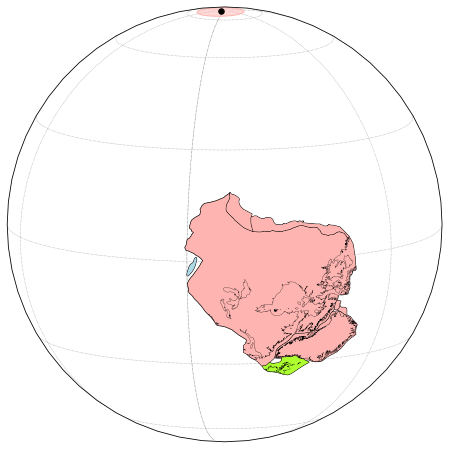

In [17]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=190, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)

plot_Laurentia(ax, Laur_Euler_530)
plot_Cuyania(ax, Laur_Euler_530)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

rotated_pole_plot(ax, 184.5, -11.9, 6.2,
                  [Laur_Euler_530],
                  'o', 30, 'k', Laurentia_color, 0.5)

plt.savefig('reconstructions/Laurentia_530.pdf')
plt.show()